In [1]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 25 10:00:00 2017

@author: droumis
"""

%matplotlib inline
%reload_ext autoreload
%pdb on


Automatic pdb calling has been turned ON



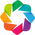

In [2]:
import loren_frank_data_processing as lfdp
# import ripple_detection as ripdetect
import replay_classification as replay
from replay_classification.simulate import get_trajectory_direction
# import pandas as pd
from collections import namedtuple
import numpy as np

In [3]:

Animal = namedtuple('Animal', {'short_name', 'directory', 'preprocessing_directory'})
animals = {
    'JZ1': Animal(short_name='JZ1',
                  directory='../Raw-Data/JZ1',
                  preprocessing_directory='../Raw-Data/JZ1')}
date = 20161117
epoch_index = ('JZ1', 4, 2)
tets = [21]
areas = ['ca1']
mark_variables = ['channel_1_max', 'channel_2_max', 'channel_3_max',
                  'channel_4_max']

In [4]:
print('\nDecoding ripples for Animal {0}, Day {1}, Epoch {2}:'.format(*epoch_index))


Decoding ripples for Animal JZ1, Day 4, Epoch 2:


In [5]:
full_tetrode_info = lfdp.make_tetrode_dataframe(animals)

In [7]:
full_tetrode_info.query('area.isin(@areas)')

area  depth  nchans  numcells   ref subarea  \
animal day epoch tetrode_number                                               
JZ1    1   1     16              ca1      0       4         0  11.0       d   
                 17              ca1      0       4         0  11.0       d   
                 18              ca1      0       4         0  11.0       d   
                 19              ca1      0       4         0  11.0       d   
                 20              ca1      0       4         0  11.0       d   
                 21              ca1      0       4         0  11.0       d   
                 22              ca1      0       4         0  11.0       d   
                 23              ca1      0       4         0  11.0       d   
                 24              ca1      0       4         0  11.0       d   
                 25              ca1      0       4         0  11.0       d   
                 26              ca1      0       4         0  11.0       d   
                 27              ca1      0       4         0  11.0       d   
                 28              ca1      0       4         0  11.0       d   
                 29              ca1      0       4         0  11.0       d   
                 30              ca1      0       4         0  11.0       d   
           2     16              ca1      0       4         0  11.0       d   
                 17              ca1      0       4         0  11.0       d   
                 18              ca1      0       4         0  11.0       d   
                 19              ca1      0       4         0  11.0       d   
                 20              ca1      0       4         0  11.0       d   
                 21              ca1      0       4         0  11.0       d   
                 22              ca1      0       4         0  11.0       d   
                 23              ca1      0       4         0  11.0       d   
                 24              ca1      0       4         0  11.0       d   
                 25              ca1      0       4         0  11.0       d   
                 26              ca1      0       4         0  11.0       d   
                 27              ca1      0       4         0  11.0       d   
                 28              ca1      0       4         0  11.0       d   
                 29              ca1      0       4         0  11.0       d   
                 30              ca1      0       4         0  11.0       d   
...                              ...    ...     ...       ...   ...     ...   
       14  8     16              ca1      0       4         0  11.0       d   
                 17              ca1      0       4         0  11.0       d   
                 18              ca1      0       4         0  11.0       d   
                 19              ca1      0       4         0  11.0       d   
                 20              ca1      0       4         0  11.0       d   
                 21              ca1      0       4         0  11.0       d   
                 22              ca1      0       4         0  11.0       d   
                 23              ca1      0       4         0  11.0       d   
                 24              ca1      0       4         0  11.0       d   
                 25              ca1      0       4         0  11.0       d   
                 26              ca1      0       4         0  11.0       d   
                 27              ca1      0       4         0  11.0       d   
                 28              ca1      0       4         0  11.0       d   
                 29              ca1      0       4         0  11.0       d   
                 30              ca1      0       4         0  11.0       d   
           9     16              ca1      0       4         0  11.0       d   
                 17              ca1      0       4         0  11.0       d   
                 18              ca1      0       4         0  11.0       d   
   

In [8]:
ep_info = full_tetrode_info.loc[epoch_index]

In [17]:
ep_info

,area,depth,nchans,numcells,ref,subarea,suparea,tetrode_id
tetrode_number,,,,,,,,
1,mec,0,4,0,11.0,2,ctx,JZ1_04_02_001
2,mec,0,4,0,11.0,5,ctx,JZ1_04_02_002
3,mec,0,8,0,11.0,5,ctx,JZ1_04_02_003
4,mec,0,4,0,11.0,6,ctx,JZ1_04_02_004
5,sub,0,4,0,11.0,d,hpc,JZ1_04_02_005
6,mec,0,4,0,11.0,6,ctx,JZ1_04_02_006
7,mec,0,4,0,11.0,5,ctx,JZ1_04_02_007
8,mec,0,4,0,11.0,2,ctx,JZ1_04_02_008
9,mec,0,4,0,11.0,2,ctx,JZ1_04_02_009


In [18]:
# multiunit_data = [lfdp.get_multiunit_indicator_dataframe(tetindex, animals).values
#                   for tetindex in full_tetrode_info.xs(epoch_index, drop_level=False).
#                       query('area.isin(@areas) & tetrode_number.isin(@tets)').index]

In [9]:
multiunit_data = [lfdp.get_multiunit_indicator_dataframe(tetindex, animals).values
                  for tetindex in full_tetrode_info.xs(epoch_index, drop_level=False).
                      query('area.isin(@areas)').index]

In [18]:
#shelf multiunit_data for quick access later
len(multiunit_data)

15

In [26]:
# a = np.unique(multiunit_data)

In [27]:
# a.size - np.isnan(a).sum() #this should give the number of spikes or return 0 if all nan

In [28]:
# np.unique(np.isnan(multiunit_data))

In [13]:
full_tetrode_info.xs(epoch_index, drop_level=False).query('area.isin(@areas)').index

MultiIndex(levels=[['JZ1'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]],
           names=['animal', 'day', 'epoch', 'tetrode_number'])

In [14]:
position_variables = ['linear_distance', 'trajectory_direction',
                      'speed']

position_info = lfdp.get_interpolated_position_dataframe(epoch_index, animals)

train_position_info = position_info.query('speed > 4')

# marks = train_position_info.join(multiunit_data[0])


# get_trajectory_direction()
trajectory_direction, is_inbound = get_trajectory_direction(position_info.linear_distance)

In [15]:
position_info.shape

(1811784, 10)

In [16]:
trajectory_direction.shape

(1811784,)

In [17]:
multiunit_data[0].shape

(1811784, 4)

In [18]:
multiunit_data

[array([[ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan]]), array([[ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan]]), array([[ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan]]), array([[ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan]]), array([[ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan],
        ..., 
        

In [19]:
decoder = replay.ClusterlessDecoder(position=position_info.linear_distance,
                              trajectory_direction=trajectory_direction,
                              spike_marks=multiunit_data,
                              replay_speedup_factor=1)
decoder.fit()

INFO:replay_classification.decoders:Fitting state transition model...
INFO:replay_classification.decoders:Fitting observation model...


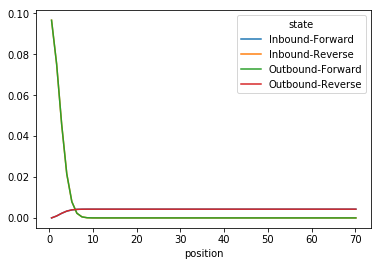

In [30]:
decoder.plot_initial_conditions()

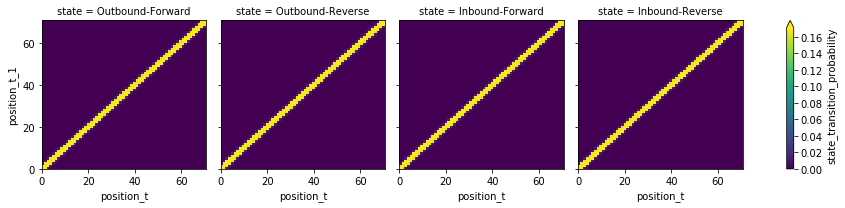

In [31]:
decoder.plot_state_transition_model()

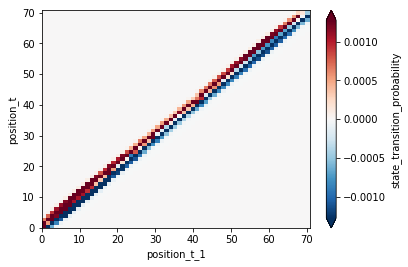

In [32]:
state_transition = decoder.state_transition_matrix

(state_transition.sel(state='Outbound-Forward') - state_transition.sel(state='Inbound-Forward')).plot(
    x='position_t_1', y='position_t', robust=True);

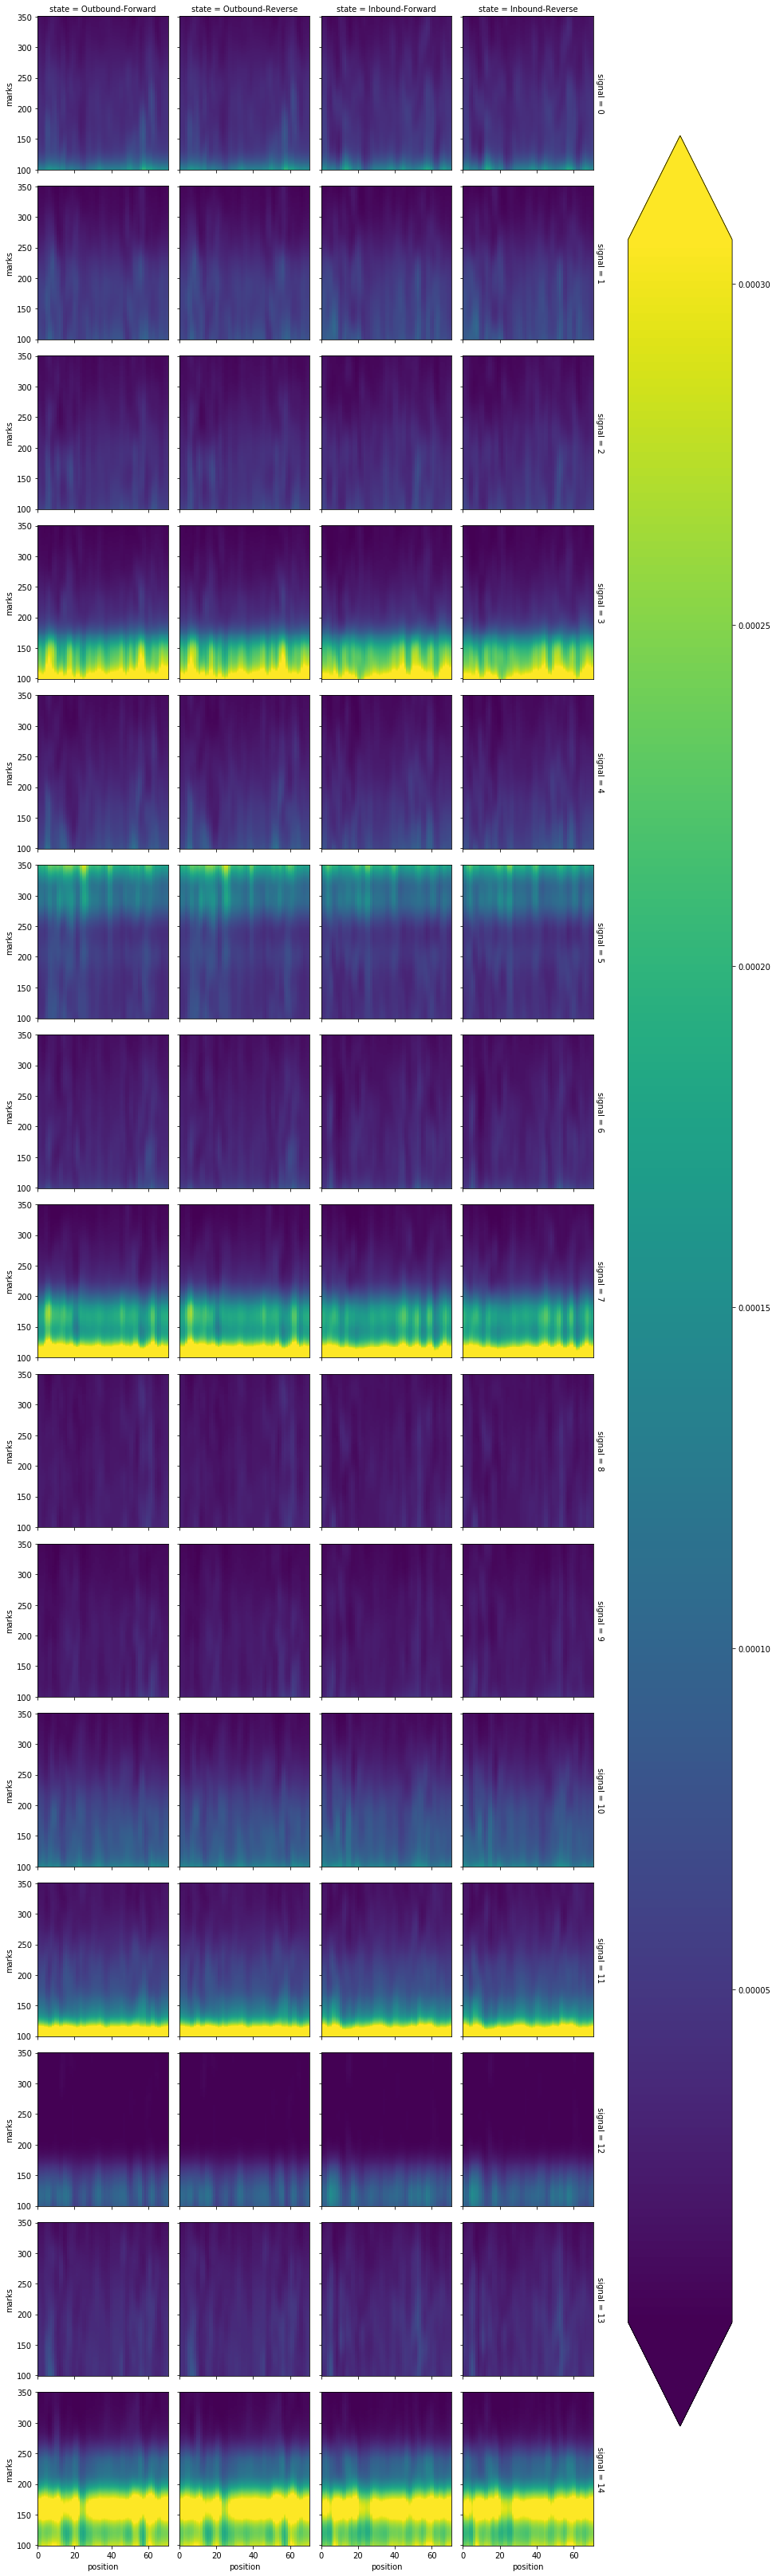

In [33]:
decoder.plot_observation_model();

In [34]:
a = decoder.predict(multiunit_data)
# a = decoder.predict(multiunit_data[0], time=position_info.index.seconds[~is_inbound])

In [ ]:
# time = 
# outbound_time = time < 0.5
# outbound_results = decoder.predict(multiunit_data[:, ~is_inbound, :], time=time[outbound_time])

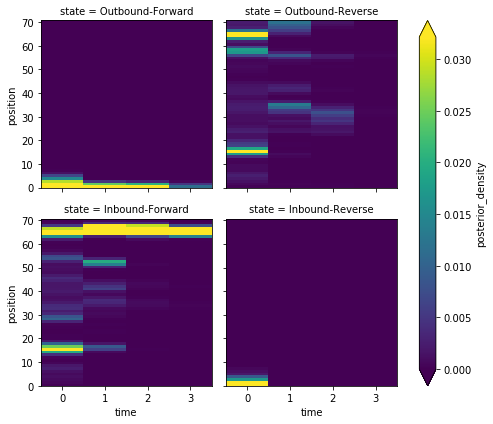

In [35]:
g = a.plot_posterior_density()
for ax in g.axes.ravel().tolist():
    ax.plot(position_info.index.seconds, position_info.linear_distance, color='white', linestyle='--', linewidth=3, alpha=0.8)

In [ ]:
outbound_results.plot_state_probability();

NameError: name 'outbound_results' is not defined

> <ipython-input-31-ea607a079379>(1)<module>()
----> 1 outbound_results.plot_state_probability();



In [ ]:
a = lfdp.get_computed_ripples_dataframe(tetindex, animals)